<a href="https://colab.research.google.com/github/atik107/Netflix-Data-Analysis-EDA-/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Import Libraries which are requried.
import numpy as np
import pandas as pd
from urllib.request import urlretrieve

In [ ]:
# Step 1: Download the CSV file
URL = "https://raw.githubusercontent.com/atik107/Netflix-Data-Analysis-EDA-/main/netflix_titles.csv"
filename = "netflix_titles.csv"  # Local filename to save
urlretrieve(URL, filename)

print("Data downloaded successfully 🚀")

Data downloaded successfully 🚀


The dataset has been downloaded and extracted.

## Data Preparation and Cleaning

> What have I done:
>
> - Load the needed libraries
> - Load the dataset into a data frame using Pandas
> - I have explored the number of rows & columns, ranges of values etc.
> - I have handled missing data NAN or BLANK value(s)

In [ ]:
# Step 2: Load the downloaded CSV file
netflix_df = pd.read_csv(filename)

netflix_df.head(5)  # Display the first few rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Some stats/info on the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Get some description of the data - ONLY release_year is NUMBER(S) VALUE(S)
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# Columns in the dataset
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Shape of The data frame
netflix_df.shape # 12 Columns and 8807 Rows

(8807, 12)

In [ ]:
# How many years of Data (1966-2021)
netflix_df["release_year"].value_counts()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1961,1
1925,1
1959,1


In [ ]:
# MOVIES vs TV SHOWS
netflix_df["type"].value_counts() # MORE MOVIES 🚀

,count
type,
Movie,6131
TV Show,2676


In [ ]:
# Check for null values in all columns of dataset
pd.DataFrame(netflix_df.isnull().sum())

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# Replace NAN value(s) with TV-MA
netflix_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)

/tmp/ipython-input-33-2987127767.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)


In [ ]:
# Replace NAN value(s) with United States
netflix_df['country'].replace(np.nan, 'United States',inplace = True)

/tmp/ipython-input-34-1082078518.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_df['country'].replace(np.nan, 'United States',inplace = True)


In [ ]:
# Rename the Column "listed_in" to "genre"
netflix_df.rename(columns={'listed_in': 'genre'},
          inplace=True, errors='raise')

## Exploratory Analysis and Visualization

I have analysed and visualised many relationships and connections between different columns to get interesting insights from our dataset.


> What have I done:
>
> - Computed the Sum(s) and Mean(s)
> - I have Explored the correlation & relationship between different data columns
> - I have noted a few of the interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# Calucating MEAN of release_year
netflix_df["release_year"].value_counts().mean()

np.float64(119.01351351351352)

The Netflix Release years, visualized via **HORIZONTAL BAR GRAPH**.

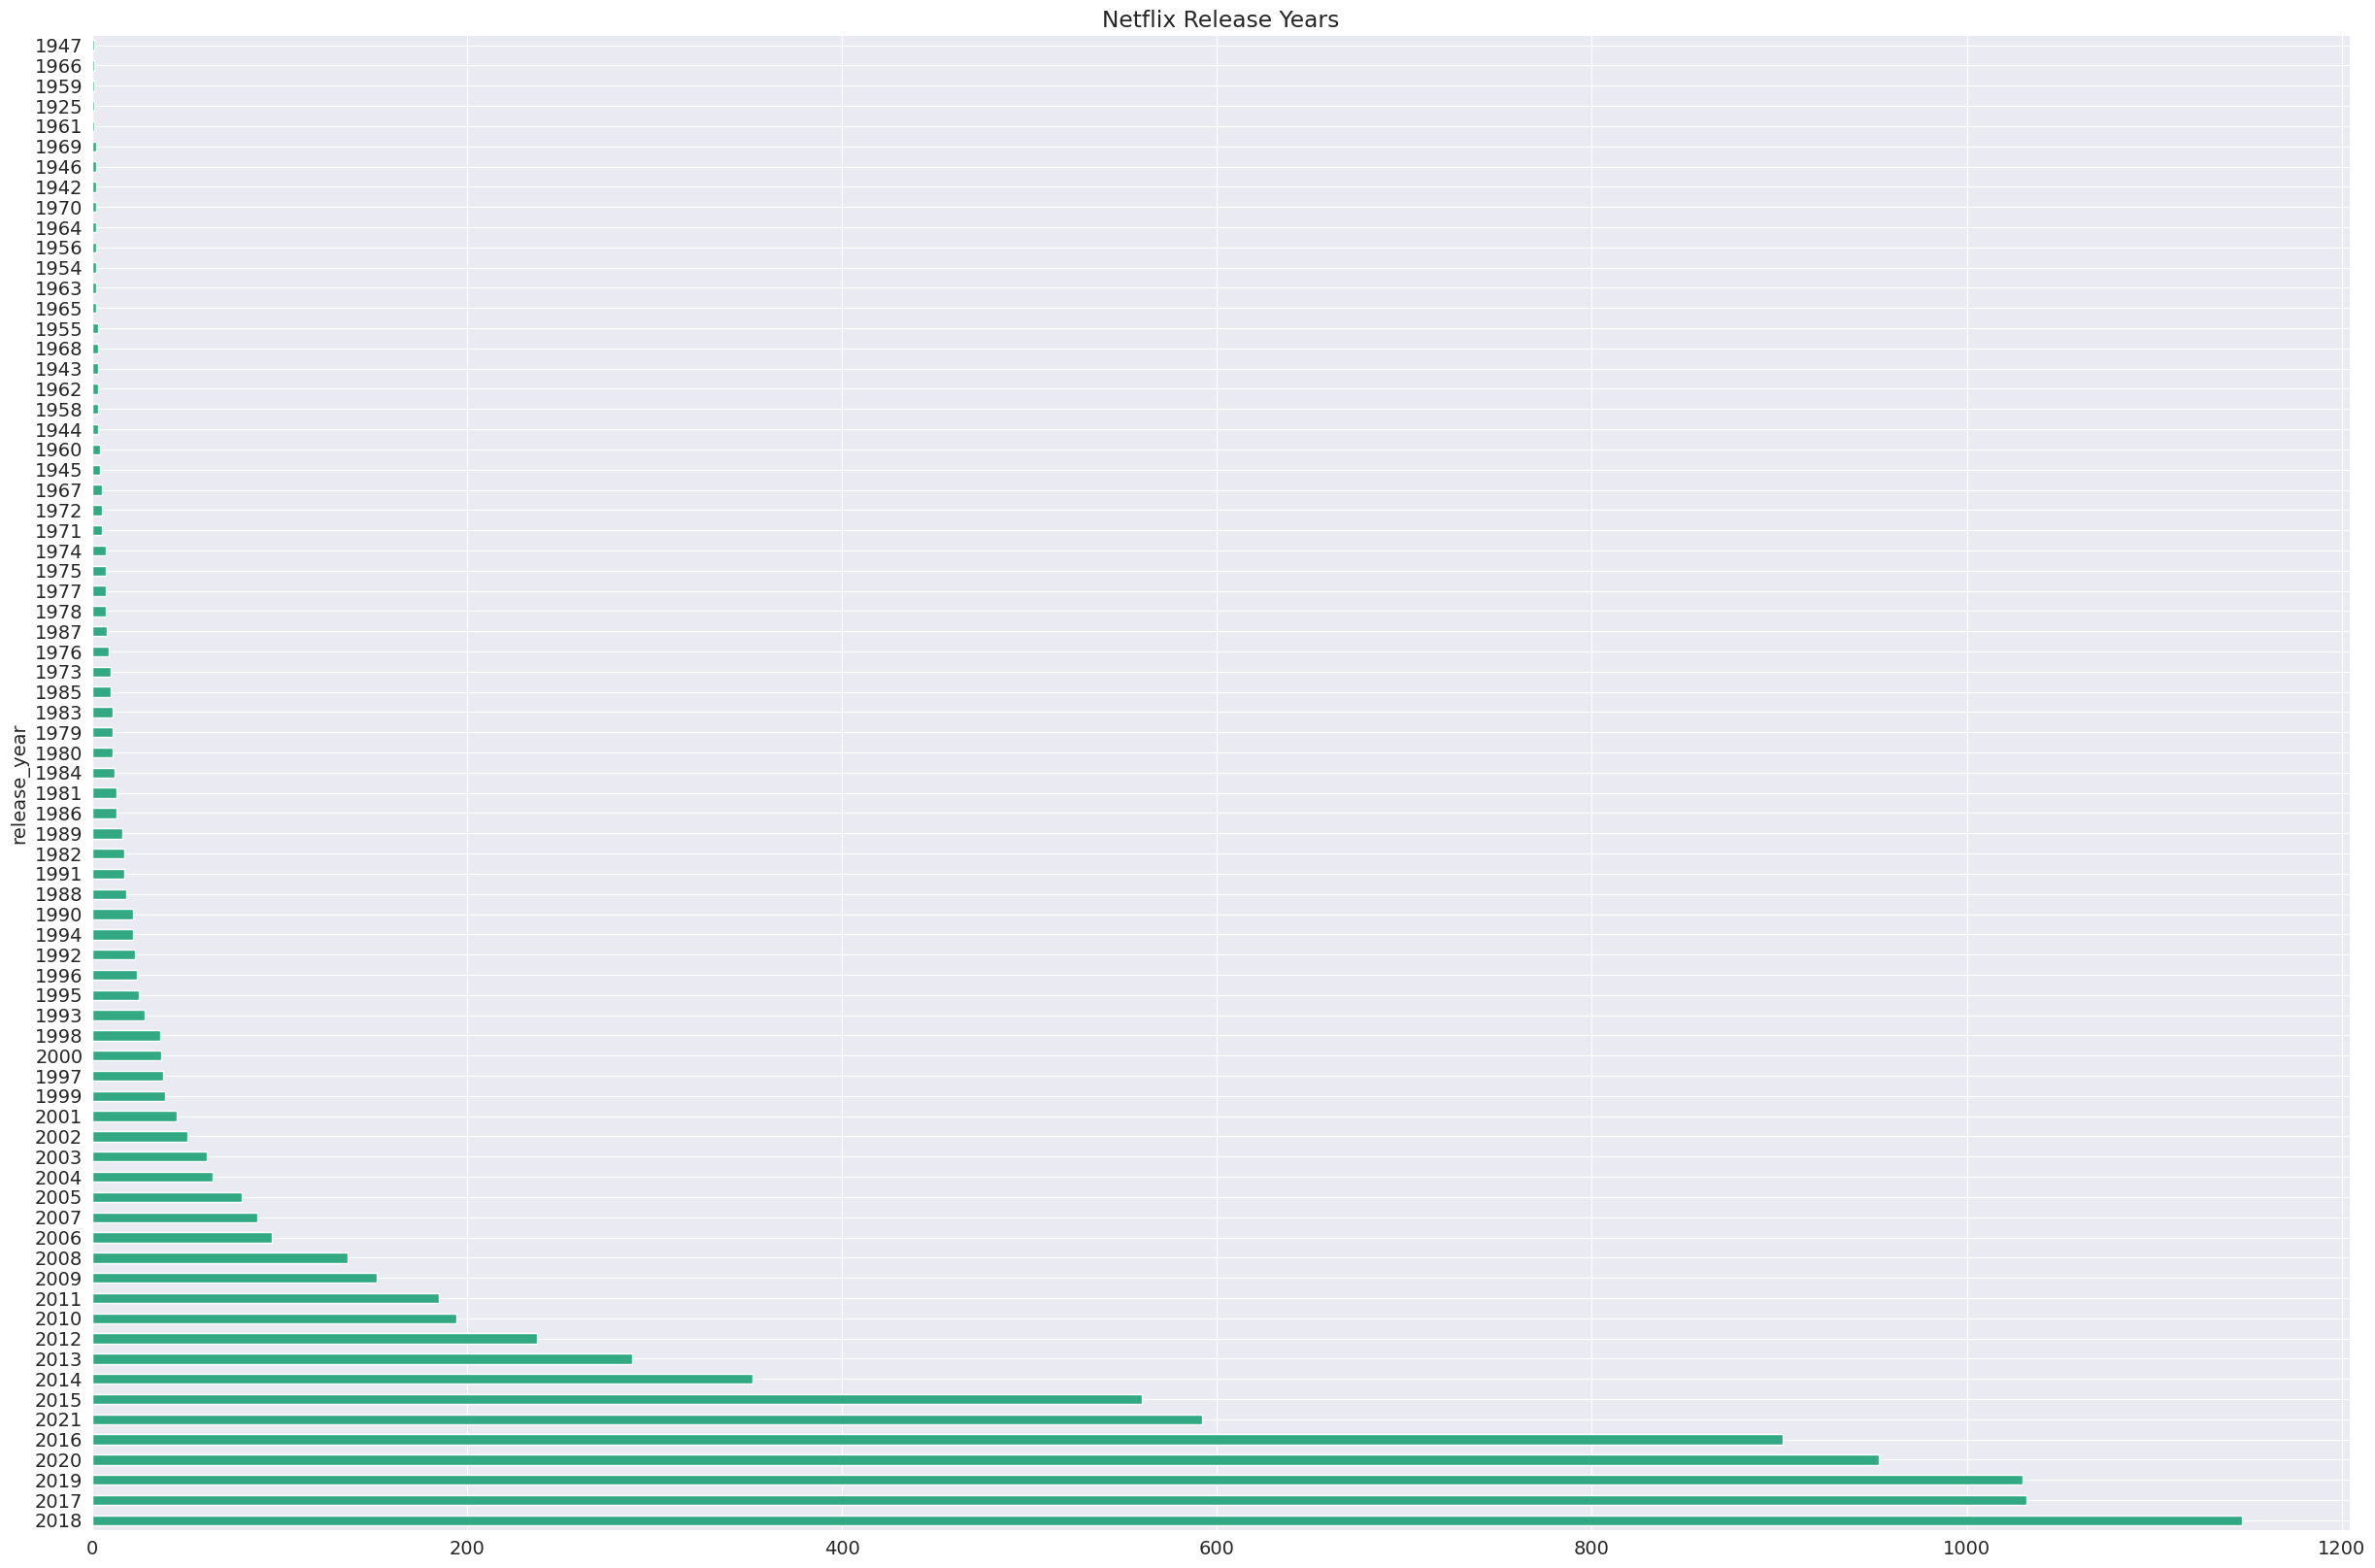

In [ ]:
plt.title('Netflix Release Years')
netflix_df["release_year"].value_counts().plot.barh(figsize=(30,20), color="#32a883")
plt.show()

These are **2 graphs**, one is a **Bar Chart** and the other one is a **Pie Chart**. This is to just visualize the amount of **TV SHOWS VS MOVIES** on Netflix!

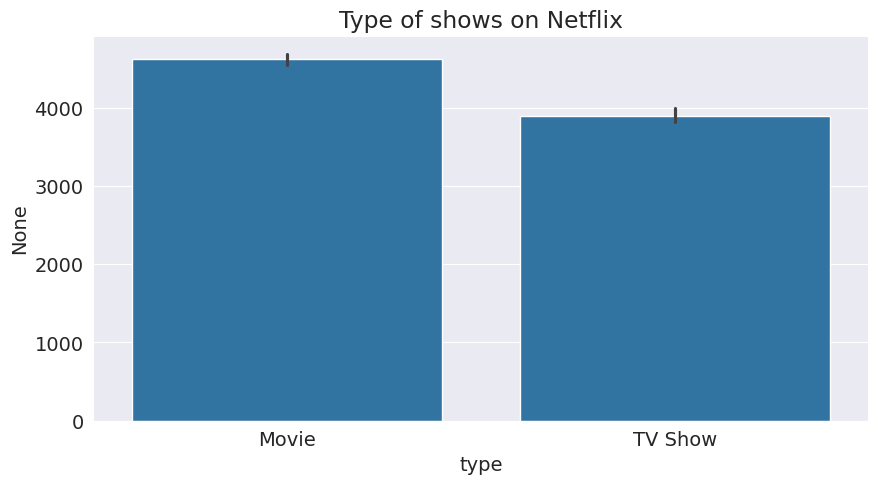

In [ ]:
# TV SHOW VS MOVIES On NETFLIX - BAR CHART
plt.figure(figsize=(10,5))
plt.title('Type of shows on Netflix')
sns.barplot(x=netflix_df['type'], y=netflix_df.index)
plt.show()

The TV Show VS Movies On NETFLIX - visualised by a **PIE CHART**.

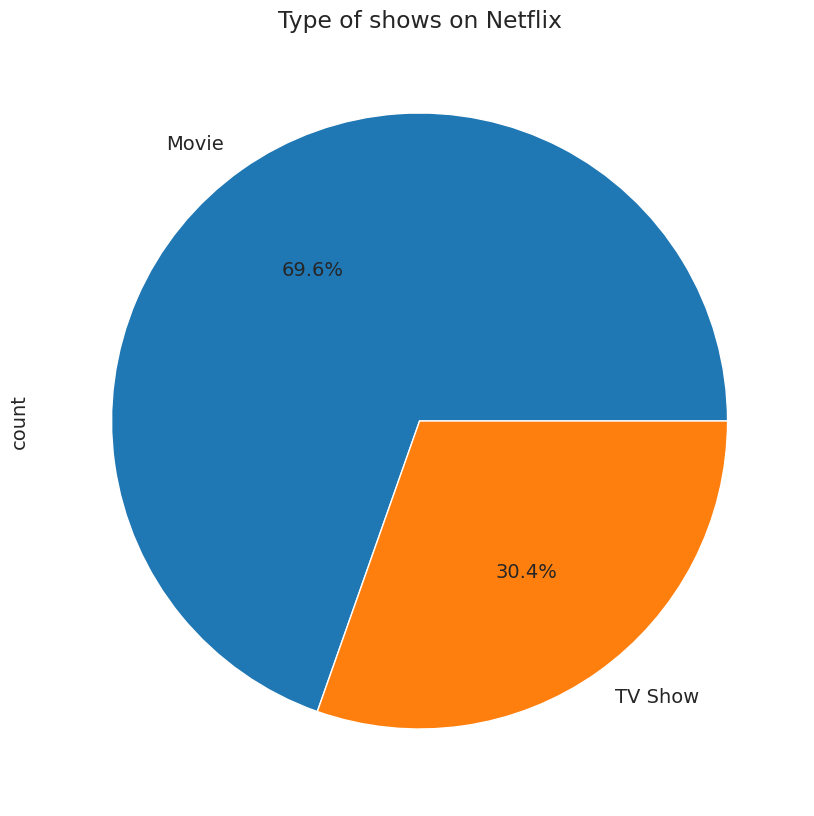

In [ ]:

plt.title('Type of shows on Netflix')
netflix_df['type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(15,10))
plt.show()

The Netflix Rating Distribution, visualised by a **COUNT PLOT**.

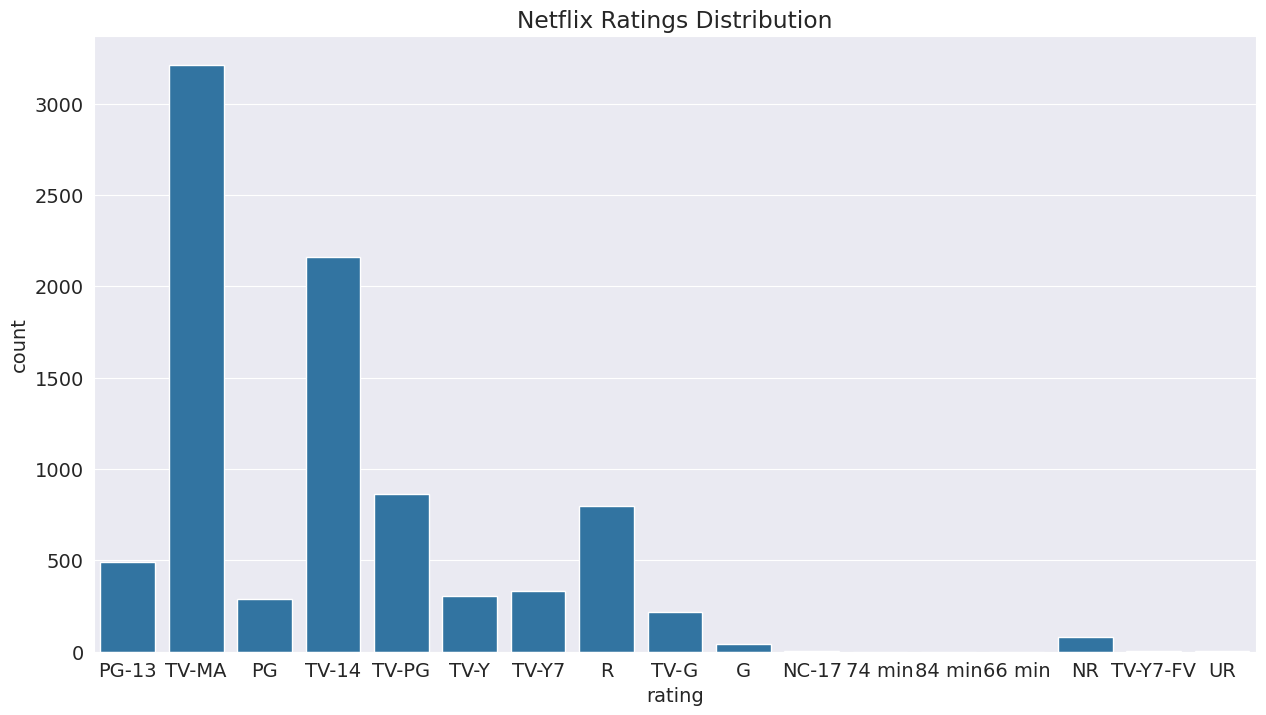

In [ ]:
plt.figure(figsize = (15,8))
plt.title('Netflix Ratings Distribution')
sns.countplot(x='rating', data = netflix_df)
plt.show()

The ratings seperated by type of release (i.e Movie, TV Show), visualised by a **COUNT PLOT**.

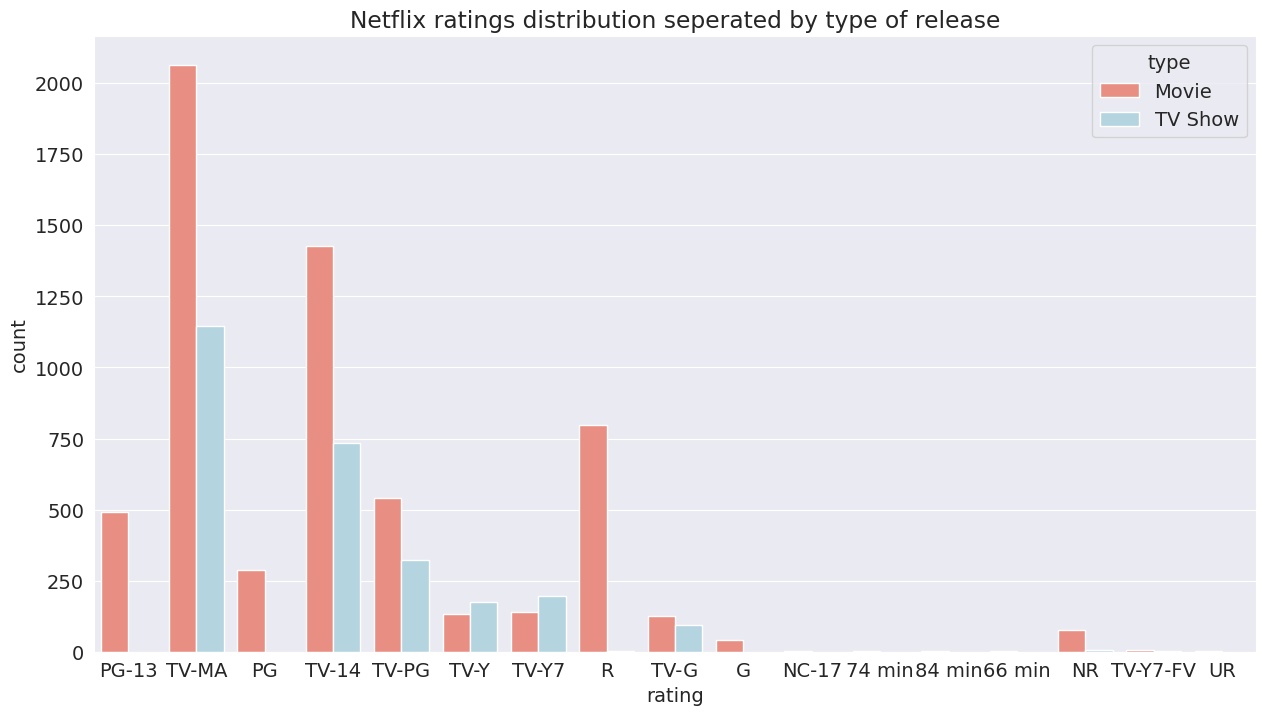

In [ ]:
plt.figure(figsize = (15,8))
plt.title('Netflix ratings distribution seperated by type of release')

# Create a dictionary mapping 'type' values to colors
type_colors = {'Movie': 'salmon', 'TV Show': 'lightblue'}

# Plotting The CountPLOT
sns.countplot(x='rating', data=netflix_df, hue="type", palette=type_colors)
plt.show()

The Top 5 countries with Highest Movies/TV Shows, visualised by a **PIE CHART**.

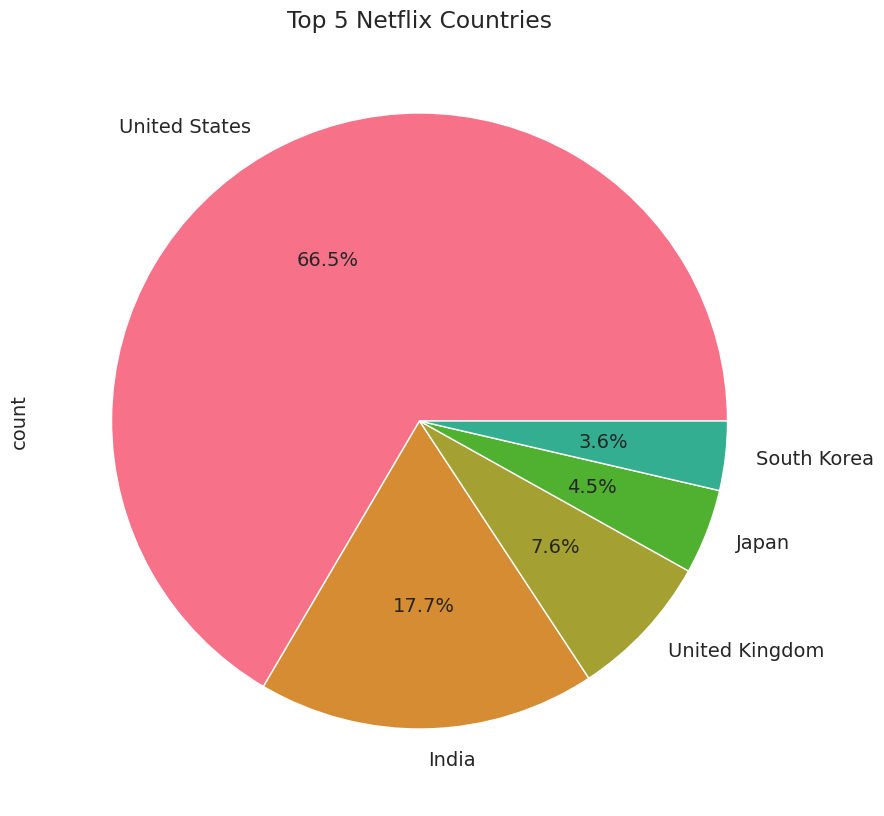

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Top 5 Netflix Countries')
colors = sns.color_palette("husl", 9)
netflix_df["country"].value_counts().nlargest(n=5).plot.pie(autopct='%1.1f%%',figsize=(15,10), colors=colors)
plt.show()

The Top 5 countries with Highest Movies/TV Shows, visualized via **HORIZONTAL BAR GRAPH**.

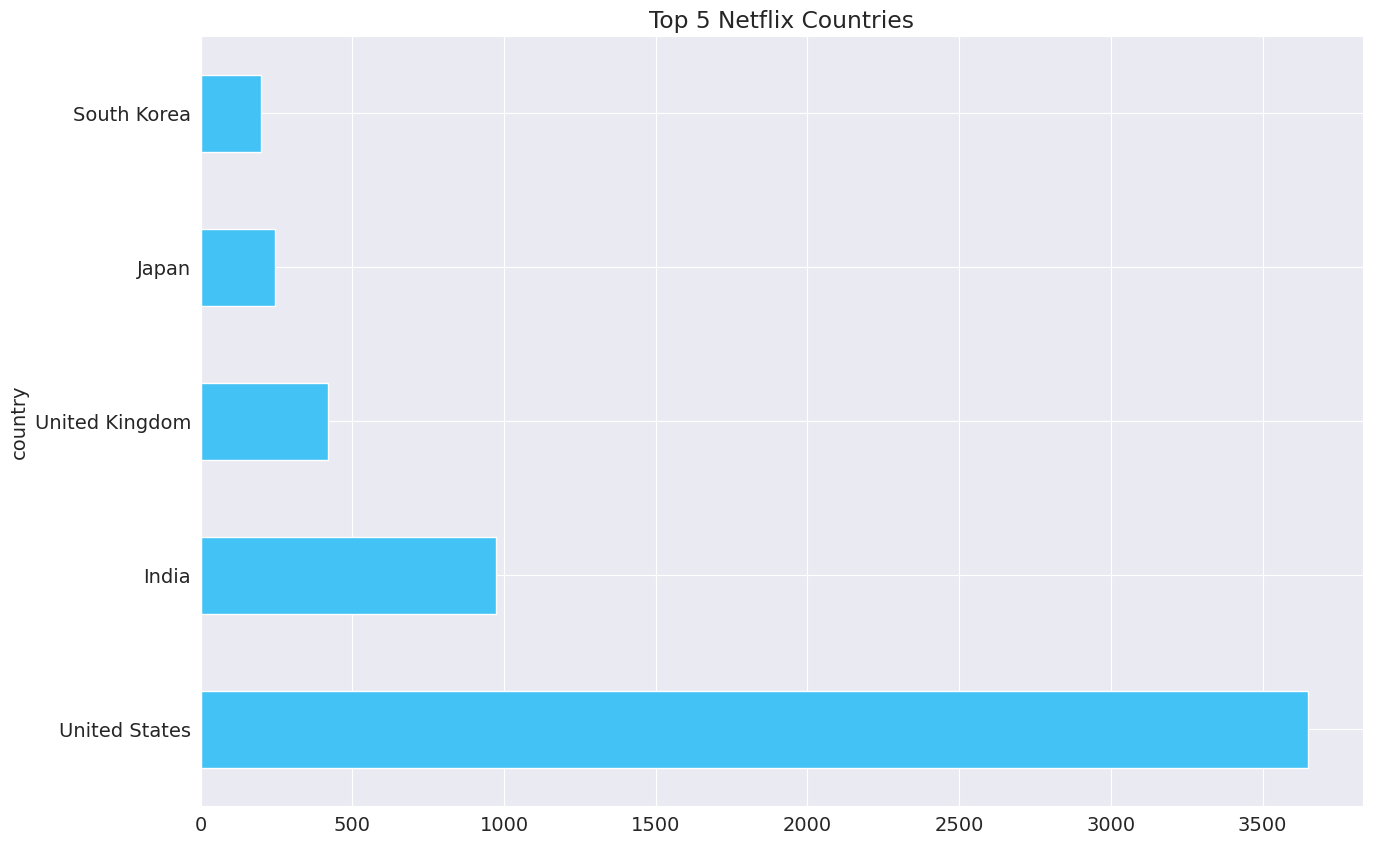

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Top 5 Netflix Countries')
netflix_df["country"].value_counts().nlargest(n=5).plot.barh(figsize=(15,10), color="#42c2f5")
plt.show()

**Top 5** Netflix country distribution seperated by type of release (i.e Movies, TV shows), visualizing via **Bar Graph**.

/tmp/ipython-input-46-1912614210.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:salmon'` for the same effect.

  sns.countplot(x='country', data=netflix_df, hue='type', order=netflix_df.country.value_counts().iloc[:5].index, color="salmon")


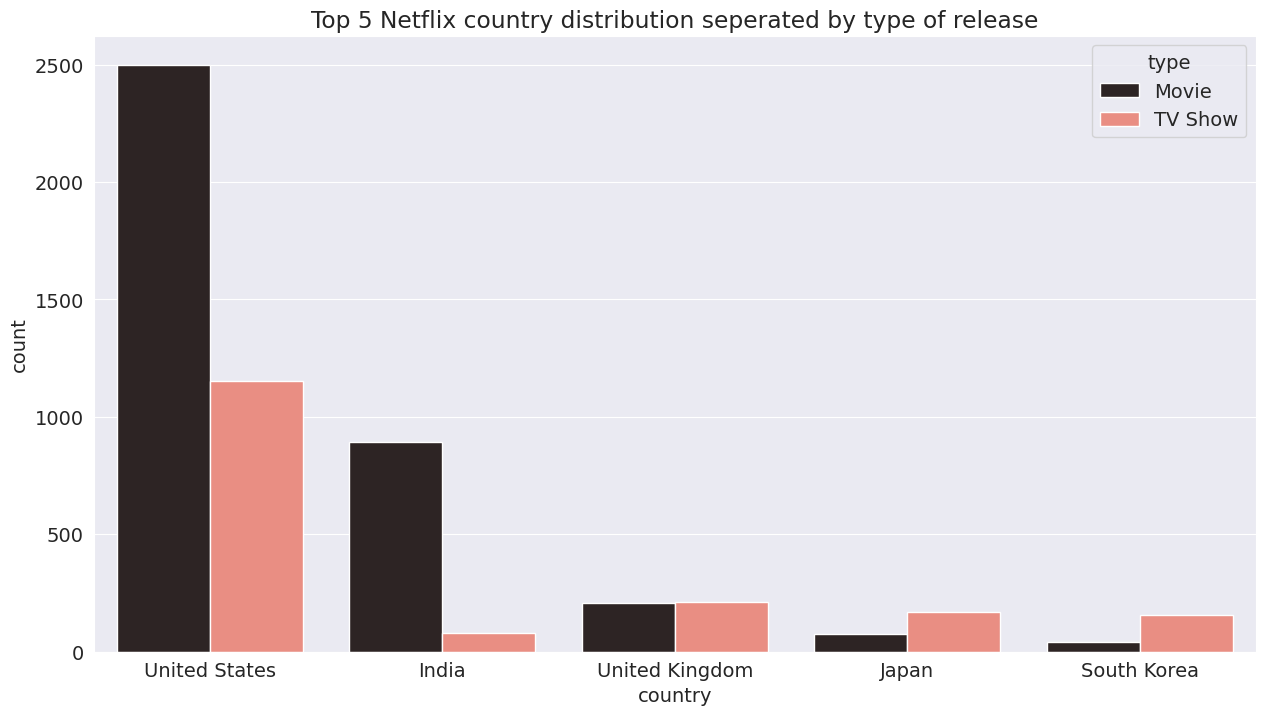

In [ ]:
plt.figure(figsize = (15,8))
plt.title('Top 5 Netflix country distribution seperated by type of release')
sns.countplot(x='country', data=netflix_df, hue='type', order=netflix_df.country.value_counts().iloc[:5].index, color="salmon")
plt.show()

## Asking and Answering Questions

These are some of the questions I really want to know about my dataset, so I can analysis and actually fine corresponding patterns, hence helping me to us these analysis into my Machine Learning Project!



#### Q1: What is the proporationality between the GENRE of Movies and TV Shows?

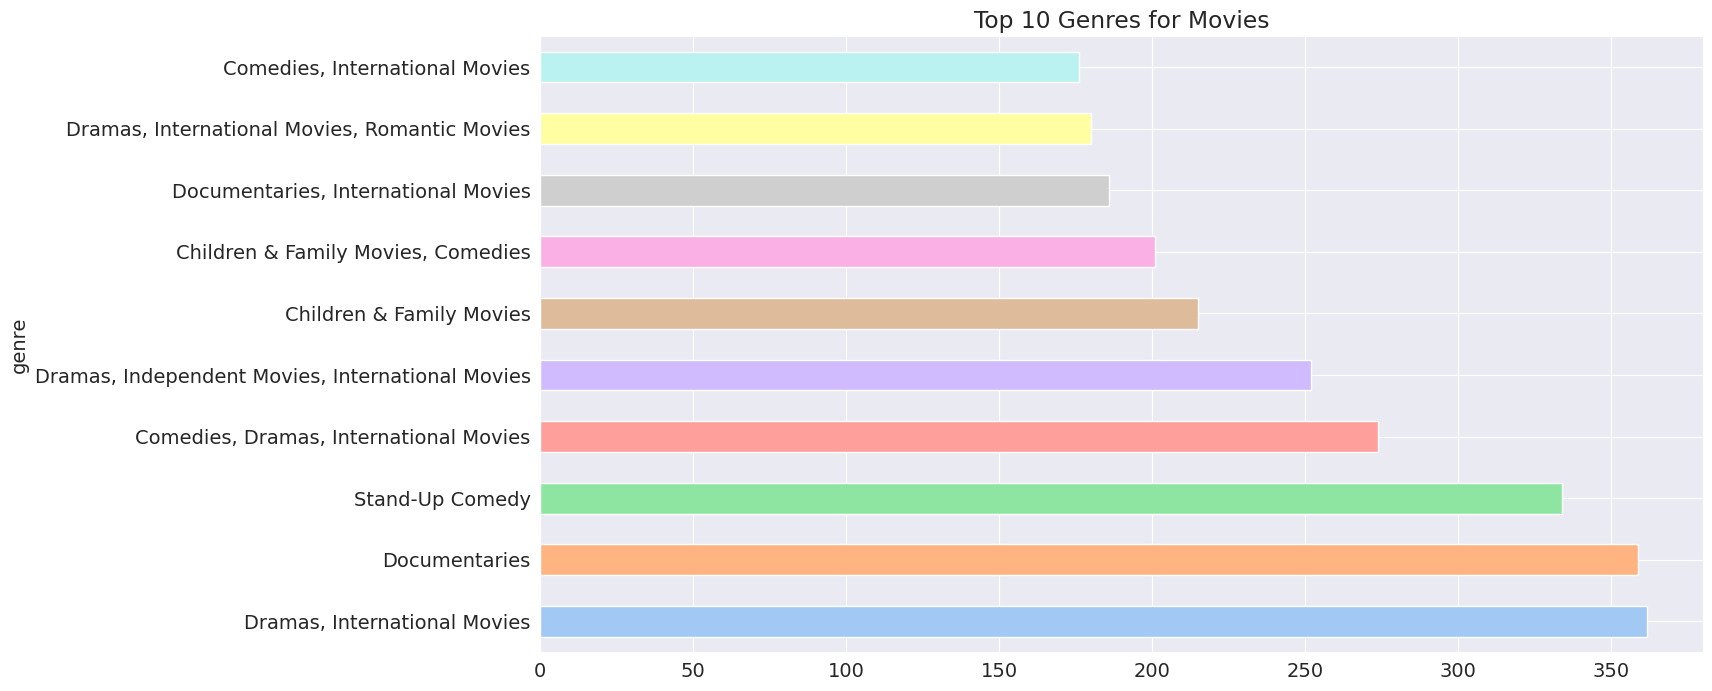

In [ ]:
# Count of movie genres
plt.figure(figsize = (15,8))
plt.title('Top 10 Genres for Movies')
colors = sns.color_palette('pastel')[0:11]
netflix_df[netflix_df["type"]=="Movie"]["genre"].value_counts()[:10].plot(kind='barh', color=colors)
plt.show()

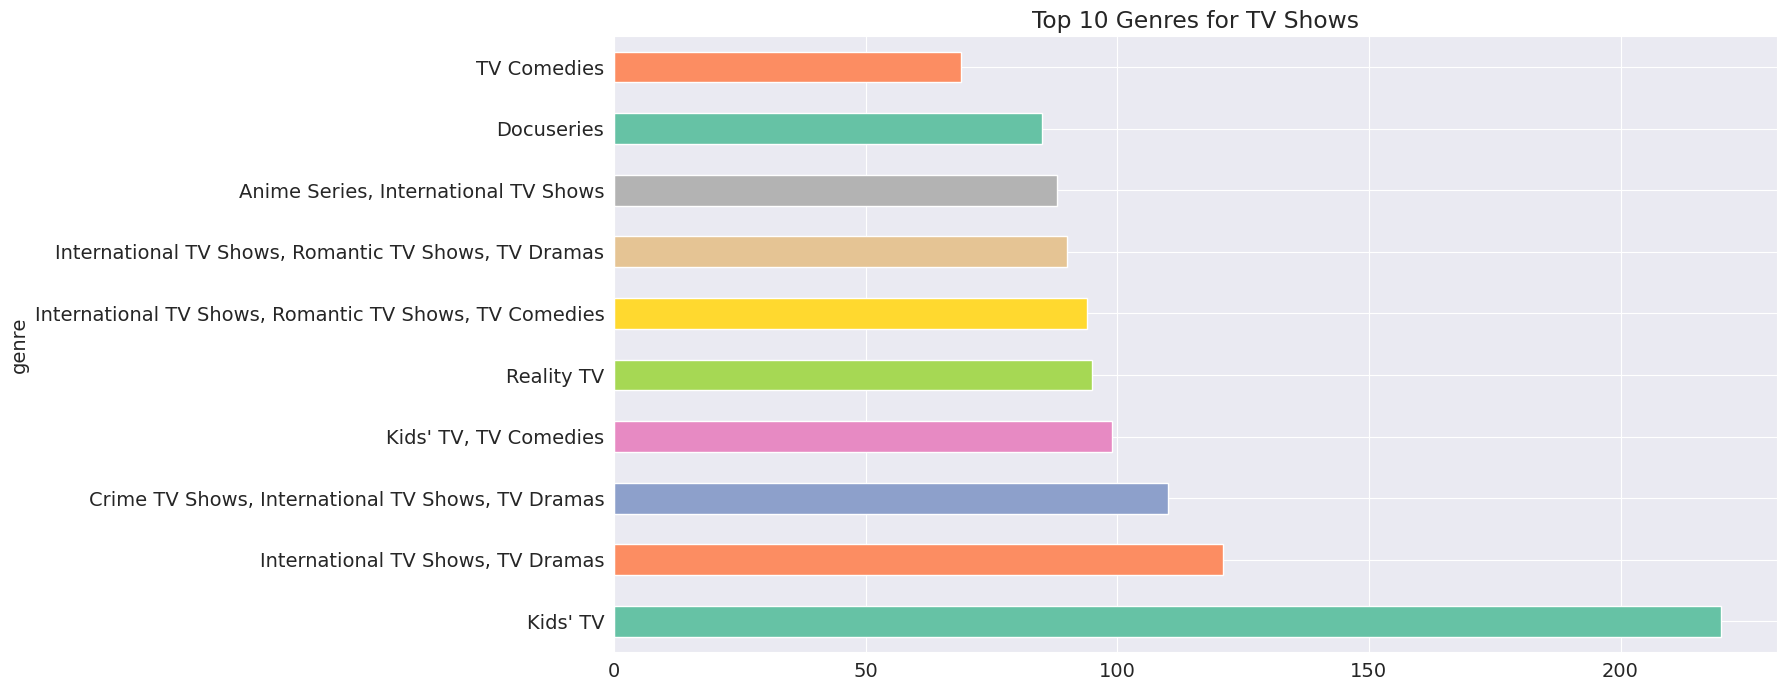

In [ ]:
# Count of TV Show genres
plt.figure(figsize = (15,8))
plt.title('Top 10 Genres for TV Shows')
colors = sns.color_palette("Set2")
netflix_df[netflix_df["type"]=="TV Show"]["genre"].value_counts()[:10].plot(kind='barh', color=colors)
plt.show()

#### Q2: Who are the top 10 actors on Netflix?

Who are the top actors? I was wondering and thought why not!

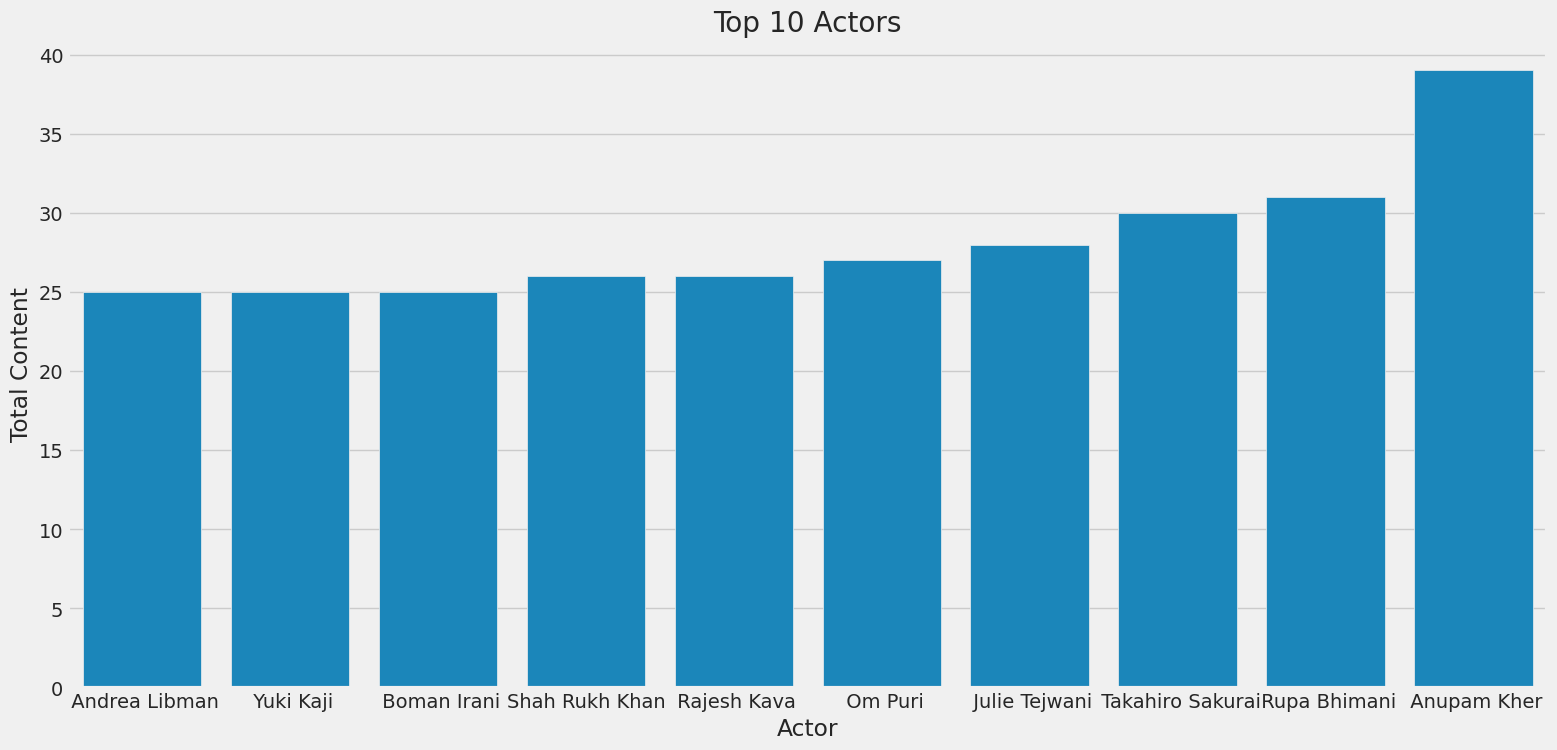

In [ ]:
# Filling NAN with values
netflix_df['cast']=netflix_df['cast'].fillna('No Cast Specified')

# Creating a DATA FRAME to store the filtered CAST (I.E ACTORS)
filtered_cast=pd.DataFrame()
filtered_cast=netflix_df['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']

# Sort the Values by the TOP 10
actors=actors.sort_values(by=['Total Content'],ascending=False)
top_actors=actors.head(10)
top_actors=top_actors.sort_values(by=['Total Content'])
x = top_actors["Actor"]
y = top_actors["Total Content"]

# PLOT the Bar Graph
plt.style.use("fivethirtyeight")
plt.figure(figsize = (17,8))
plt.title('Top 10 Actors')
sns.barplot(x = x, y = y)
plt.show()

#### Q3: Does Netflix upload more Movies or TV shows?

Clearly, as visualize via this plot, we can see that Netflix released more movies than tv shows, atleast from 2005-2018. However since then, the amount being published (MOVIES) dramtically decreased.

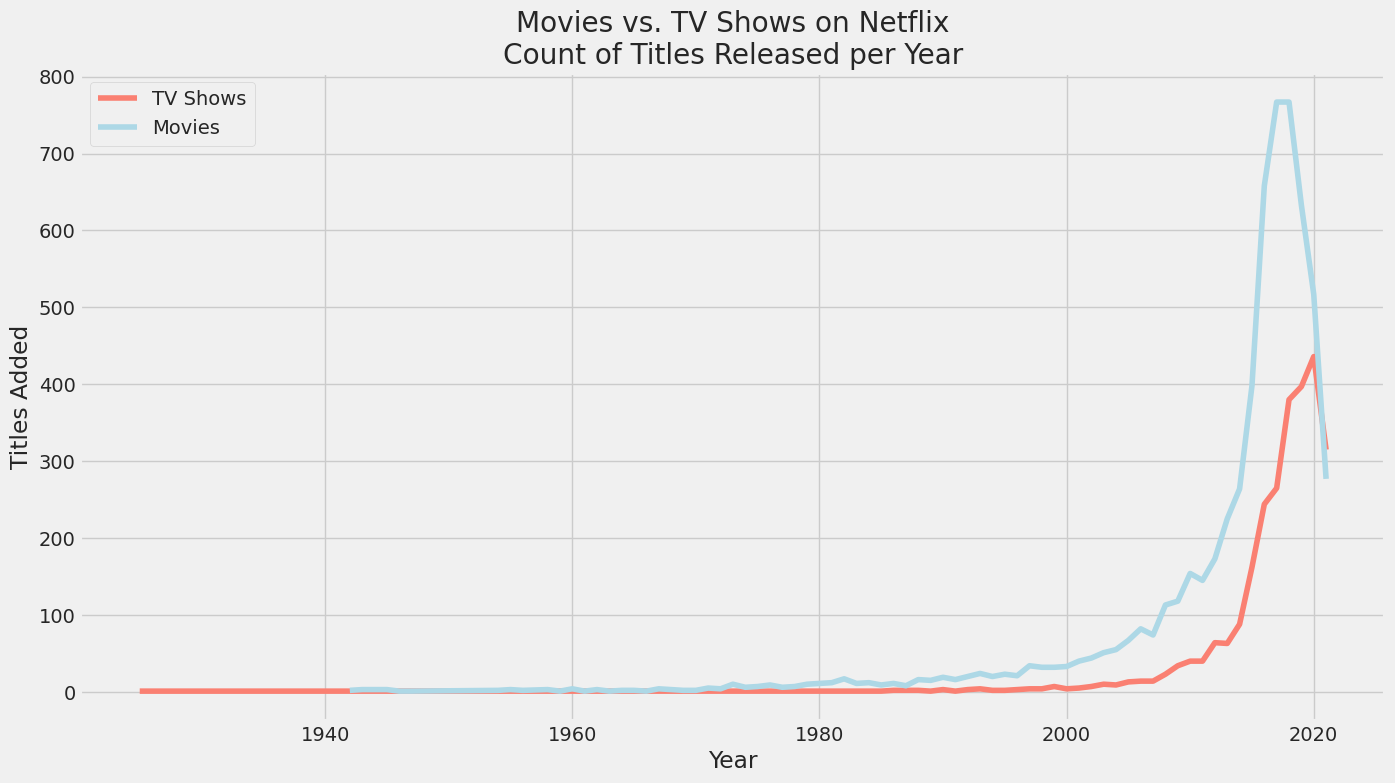

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(netflix_df[netflix_df['type']=='TV Show'].groupby('release_year')['type'].count(), color='salmon', linewidth=4)
plt.plot(netflix_df[netflix_df['type']=='Movie'].groupby('release_year')['type'].count(), color='lightblue',linewidth=4)
plt.xlabel("Year")
plt.ylabel("Titles Added")
plt.title("Movies vs. TV Shows on Netflix\nCount of Titles Released per Year")
plt.legend(['TV Shows','Movies'])

plt.show()

#### Q4: When is the Best to time to release a Movie/TV shows?

This heatmap shows the best time of the year (WHEN IT WAS) to release to Netflix, **I.E Month and Year**. Moreover you can see that the best time to release looks like March, July, Auguest and September. You can actually use this to predict future results. In my opinion I see a very nice trend in **July** as the heatmap is getting darker as we move rightwards!

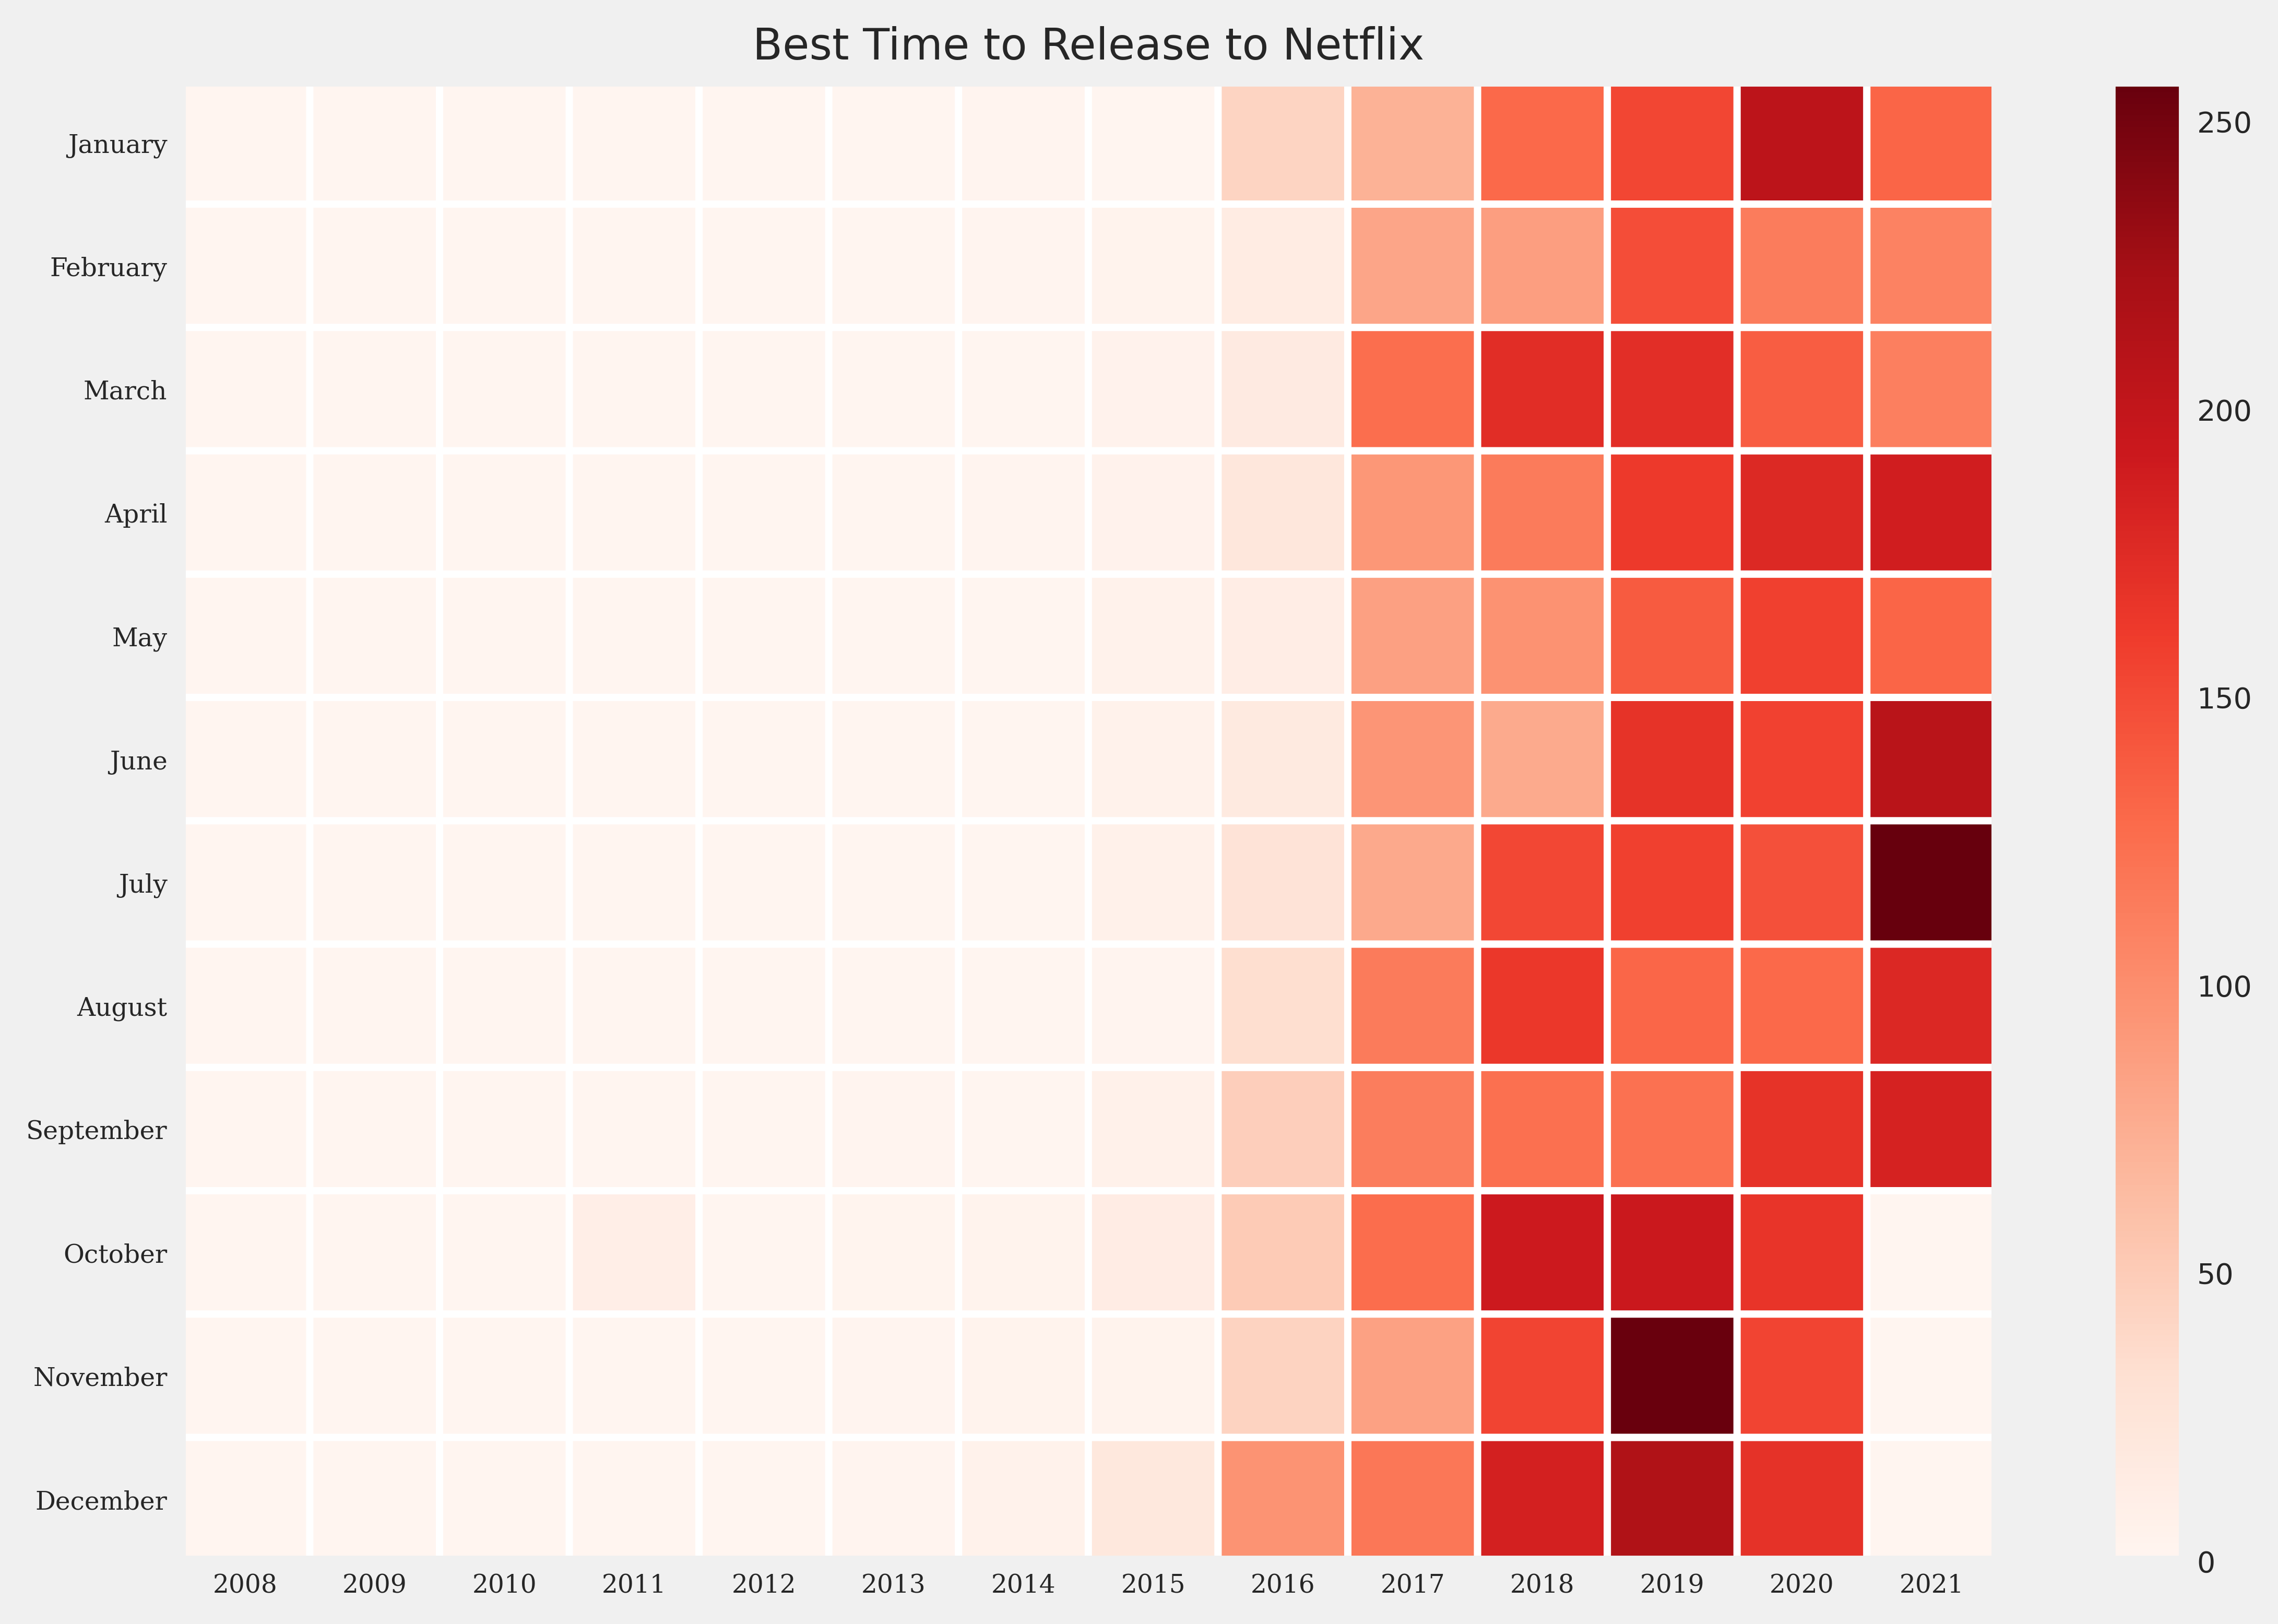

In [ ]:
# Parsing the Dates
netflix_date = netflix_df[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

# Adding the Months and Grouping
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

# Customizing the figure design etc.
plt.figure(figsize=(10, 7), dpi=500)
plt.pcolor(df, cmap='Reds', edgecolors='white', linewidths=2) # heatmap

# Adding y and x ticks
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

# Adding the Title
plt.title('Best Time to Release to Netflix', fontsize=12, position=(0.50, 1.0+0.02))

# Adding the Colorbar
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

#### Q5: What are the TV shows with largest number of seasons?

/tmp/ipython-input-52-3515643450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query1['season']=query1.duration.str[:2]
/tmp/ipython-input-52-3515643450.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query1['season'] = list1


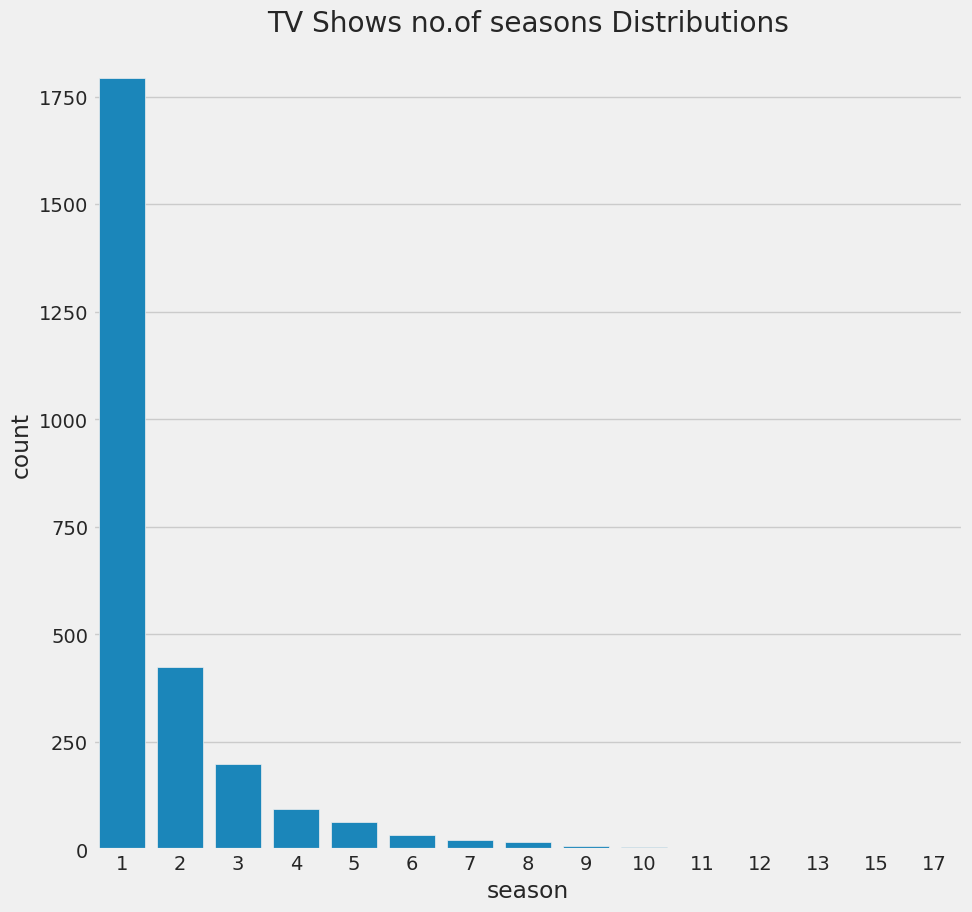

In [ ]:
cond = netflix_df[['duration']].apply(lambda x:x.str.contains('Season|Seasons',regex =True)).any(axis =1)

query1 = netflix_df[cond]
query1.index = np.arange(len(query1))
query1['season']=query1.duration.str[:2]
list1 = list(query1['season'])
for i in range(len(list1)):
    list1[i] = int(list1[i])
query1['season'] = list1


plt.figure(figsize =(10,10))
sns.countplot(x=query1.season)
plt.title('TV Shows no.of seasons Distributions')
plt.style.use("fivethirtyeight")
plt.show()

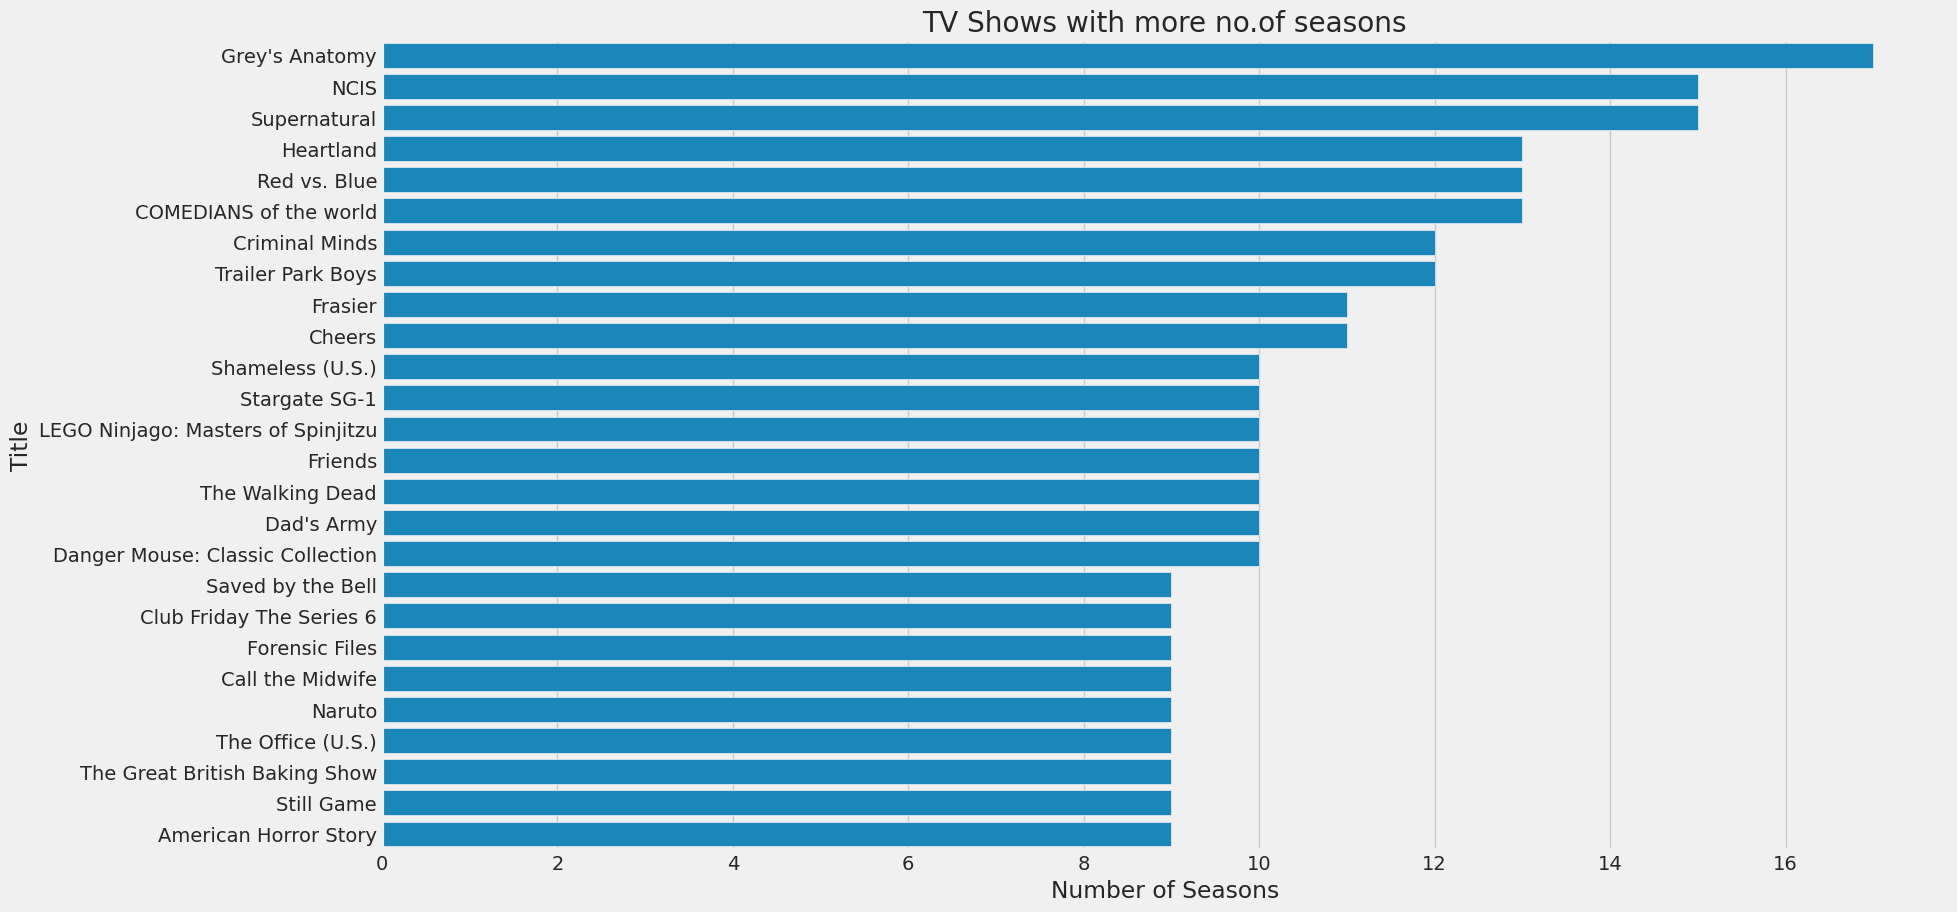

In [ ]:
sub_query1 =query1.season.groupby(query1.title).sum().sort_values(ascending = False)
plt.figure(figsize =(18,10))
sns.barplot(y=sub_query1[sub_query1>=9].index,x = sub_query1[sub_query1>=9].values)
plt.title('TV Shows with more no.of seasons')
plt.ylabel("Title")
plt.xlabel("Number of Seasons")
plt.show()

**Q6: Who are the most famous directors?**

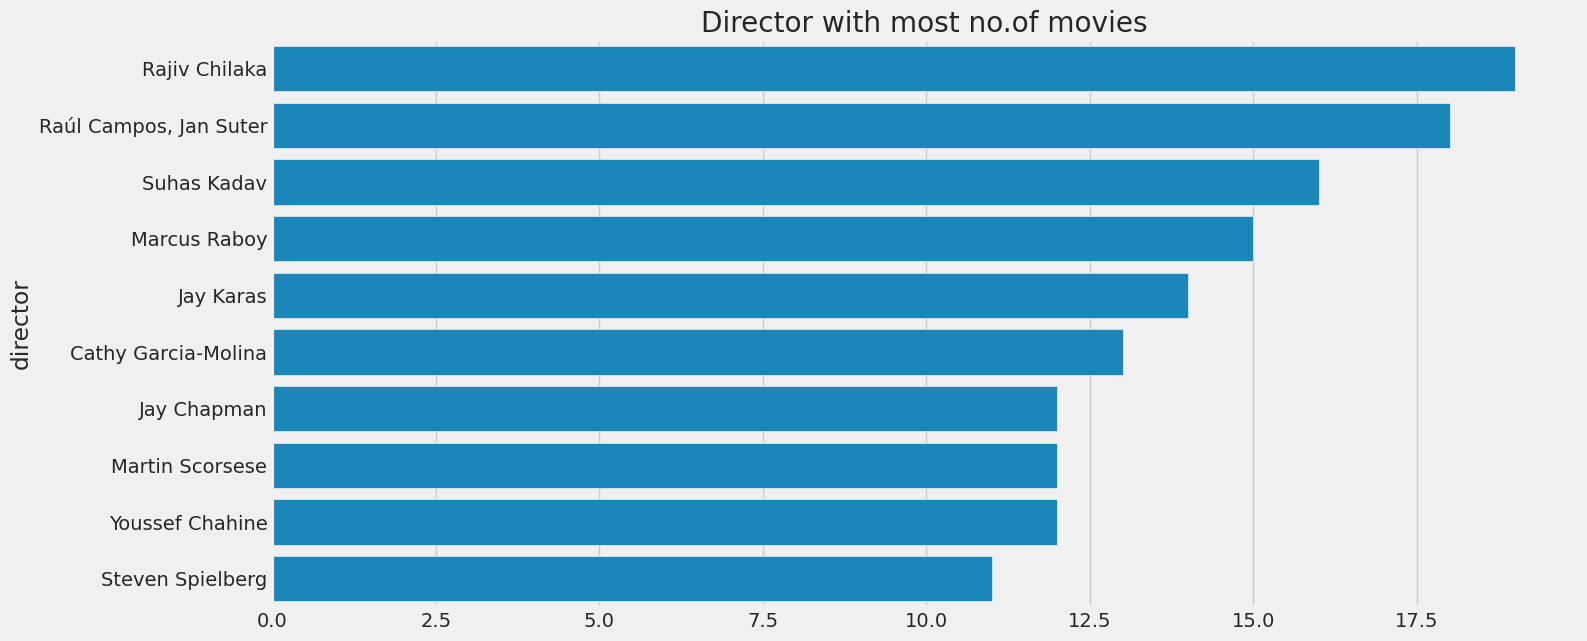

In [ ]:
query3 = netflix_df[~cond]
query3.index = np.arange(len(query3))
sub_query2 = query3.director.value_counts()[:10]
plt.figure(figsize=(15, 7))
sns.barplot(y = sub_query2.index,x = sub_query2.values)
plt.title('Director with most no.of movies')
plt.show()

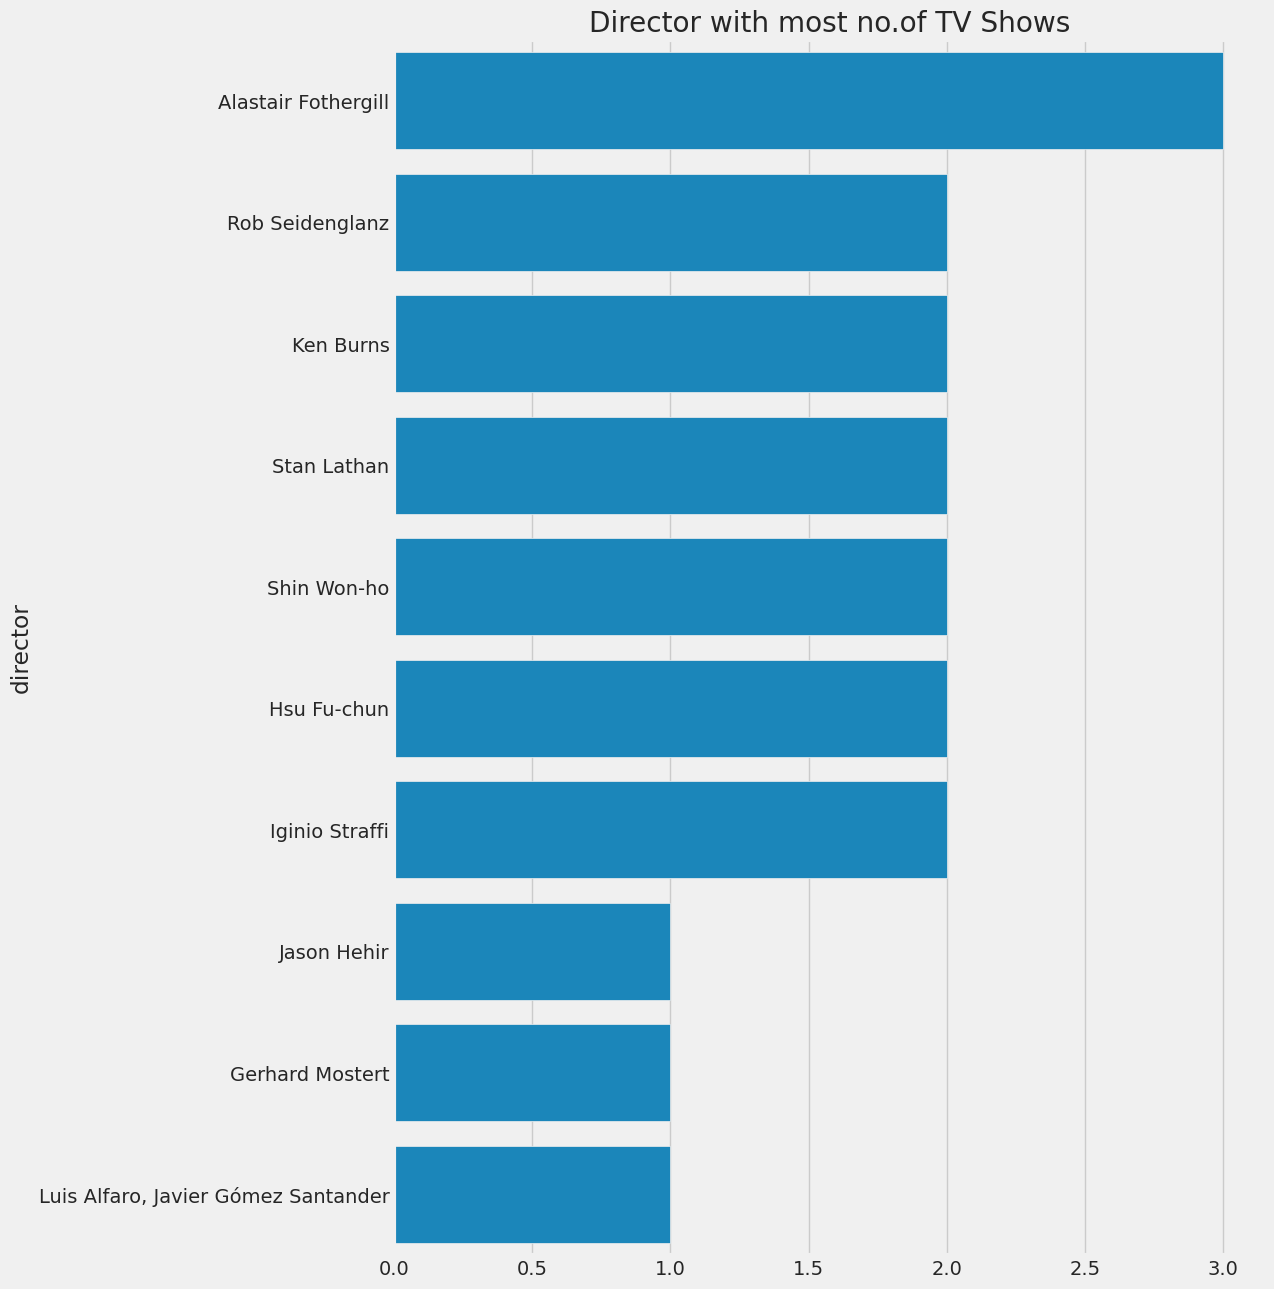

In [ ]:
query4 = netflix_df[cond]
query4.index = np.arange(len(query4))
sub_query3 = query4.director.value_counts()[:10]
plt.figure(figsize=(10,15))
sns.barplot(y = sub_query3.index,x = sub_query3.values)
plt.title('Director with most no.of TV Shows')
plt.show()

# Clustering Movies by Duration & Genre Similarity

/tmp/ipython-input-61-2783750348.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['cluster'] = kmeans.fit_predict(X)


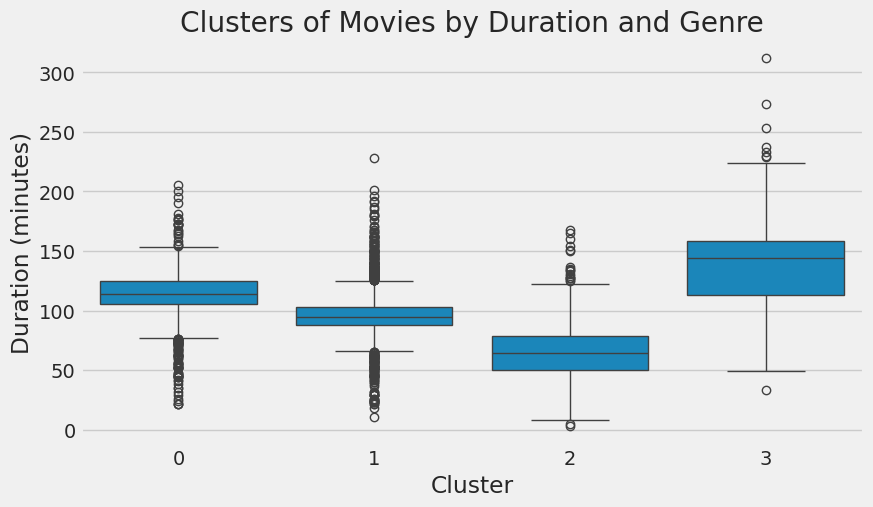

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer

# Prepare data
movie_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
movie_df['duration_num'] = movie_df['duration'].str.extract('(\d+)').astype(float)

# Encode genres
movie_df['genres'] = movie_df['genre'].dropna().str.split(', ')
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movie_df['genres'].dropna())

# Combine features
import numpy as np
X = np.hstack((movie_df['duration_num'].dropna().values.reshape(-1,1), genre_encoded[:len(movie_df['duration_num'].dropna())]))

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
movie_df = movie_df.iloc[:len(X)]
movie_df['cluster'] = kmeans.fit_predict(X)

# Visualize cluster
import seaborn as sns
sns.boxplot(x='cluster', y='duration_num', data=movie_df)
plt.title("Clusters of Movies by Duration and Genre")
plt.xlabel("Cluster")
plt.ylabel("Duration (minutes)")
plt.show()

# Frequent Collaborations Between Actor–Director

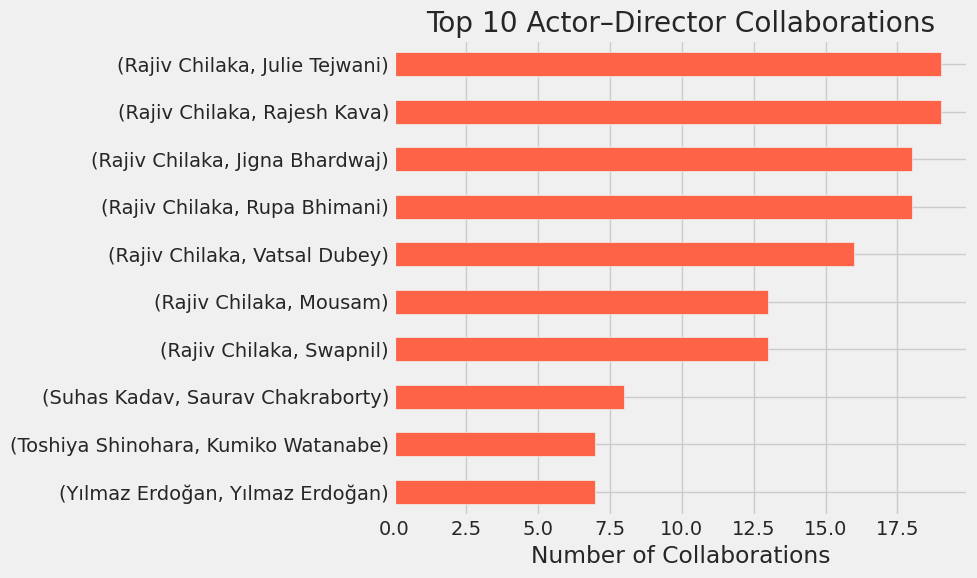

In [ ]:
from itertools import product

collab_df = netflix_df[['director', 'cast']].dropna()
collab_df = collab_df[collab_df['director'] != '']

collab_pairs = []

for _, row in collab_df.iterrows():
    directors = [d.strip() for d in row['director'].split(',')]
    actors = [a.strip() for a in row['cast'].split(',')]
    collab_pairs.extend(list(product(directors, actors)))

from collections import Counter
collab_counter = Counter(collab_pairs)
top_collabs = pd.Series(dict(collab_counter)).sort_values(ascending=False).head(10)

top_collabs.plot(kind='barh', figsize=(10,6), color='tomato')
plt.title("Top 10 Actor–Director Collaborations")
plt.xlabel("Number of Collaborations")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


# Heatmap of Type vs Country vs Content Count

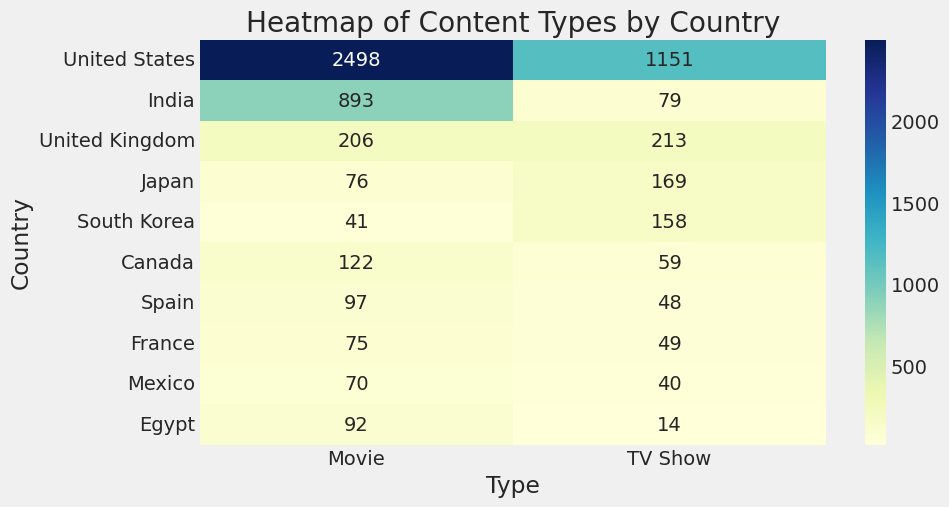

In [ ]:
heat_df = netflix_df.groupby(['country', 'type']).size().unstack().fillna(0).astype(int)
top_countries = heat_df.sum(axis=1).sort_values(ascending=False).head(10)
heatmap_data = heat_df.loc[top_countries.index]

import seaborn as sns
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Content Types by Country")
plt.ylabel("Country")
plt.xlabel("Type")
plt.show()


# Conclusion & project summary:

> This project provided meaningful insights into Netflix’s content strategy by analyzing trends in genres, release patterns, and regional contributions. Through visualizations and advanced analysis, it highlighted how Netflix’s offerings have evolved over time, revealing key patterns in user preferences and production focus.
